In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
train_data = pd.read_csv('../data/train_FD001.txt', sep=' ', header=None)
test_data = pd.read_csv('../data/test_FD001.txt', sep=' ', header=None)
rul_data = pd.read_csv('../data/RUL_FD001.txt', sep=' ', header=None)

train_data.drop([26, 27], axis=1, inplace=True)
test_data.drop([26, 27], axis=1, inplace=True)

column_names = ['engine_no', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor_measurement_{i}' for i in range(1, 22)]
train_data.columns = column_names
test_data.columns = column_names


In [6]:
print(train_data.shape) 
train_data.head()


(20631, 26)


,engine_no,cycle,setting1,setting2,setting3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
# Step 1: Find max cycle per engine
max_cycle = train_data.groupby('engine_no')['cycle'].max().reset_index()
max_cycle.columns = ['engine_no', 'max_cycle']

# Step 2: Merge max cycle info back to the train data
train_data = train_data.merge(max_cycle, on='engine_no', how='left')

# Step 3: Calculate RUL
train_data['RUL'] = train_data['max_cycle'] - train_data['cycle']

# Step 4: Drop 'max_cycle' (no longer needed)
train_data.drop('max_cycle', axis=1, inplace=True)

# Step 5: Quick check
train_data[['engine_no', 'cycle', 'RUL']].head(10)


,engine_no,cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
5,1,6,186
6,1,7,185
7,1,8,184
8,1,9,183
9,1,10,182


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select sensor columns
sensor_cols = [col for col in train_data.columns if 'sensor_measurement' in col]

# Step 2: Initialize Scaler
scaler = MinMaxScaler()

# Step 3: Fit and transform train data sensors
train_data[sensor_cols] = scaler.fit_transform(train_data[sensor_cols])

# Step 4: Also normalize settings
setting_cols = ['setting1', 'setting2', 'setting3']
train_data[setting_cols] = scaler.fit_transform(train_data[setting_cols])

# Step 5: Quick check
train_data.head()


,engine_no,cycle,setting1,setting2,setting3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187


In [11]:
# Step 1: Initialize two scalers
scaler_sensors = MinMaxScaler()
scaler_settings = MinMaxScaler()

# Step 2: Fit scalers
train_data[sensor_cols] = scaler_sensors.fit_transform(train_data[sensor_cols])
train_data[setting_cols] = scaler_settings.fit_transform(train_data[setting_cols])


In [12]:
# Step 3: Transform using the same scalers
test_data[sensor_cols] = scaler_sensors.transform(test_data[sensor_cols])
test_data[setting_cols] = scaler_settings.transform(test_data[setting_cols])


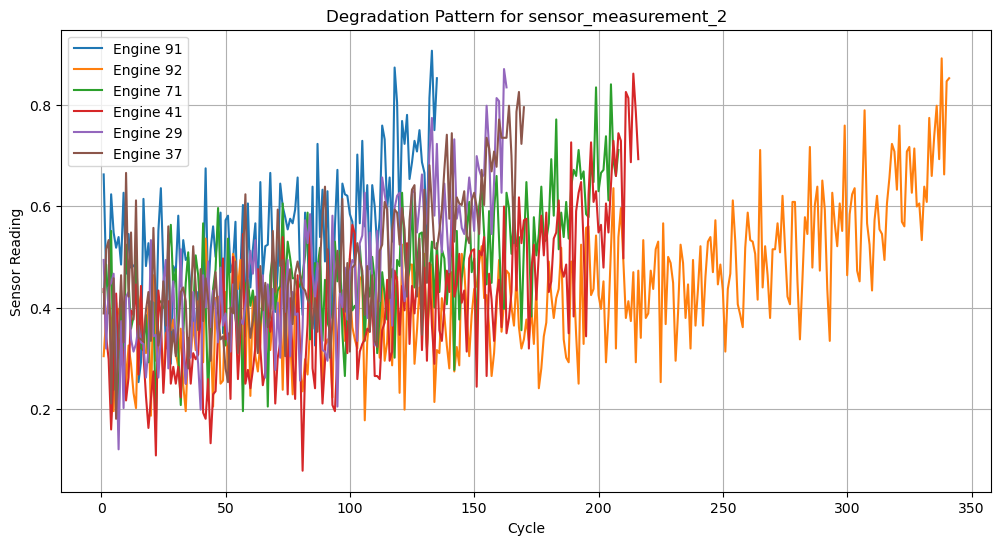

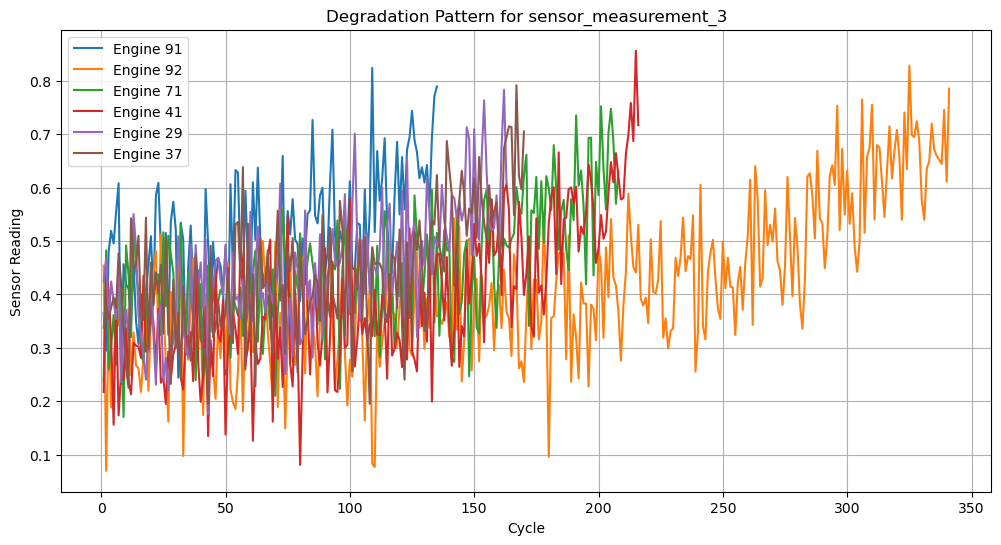

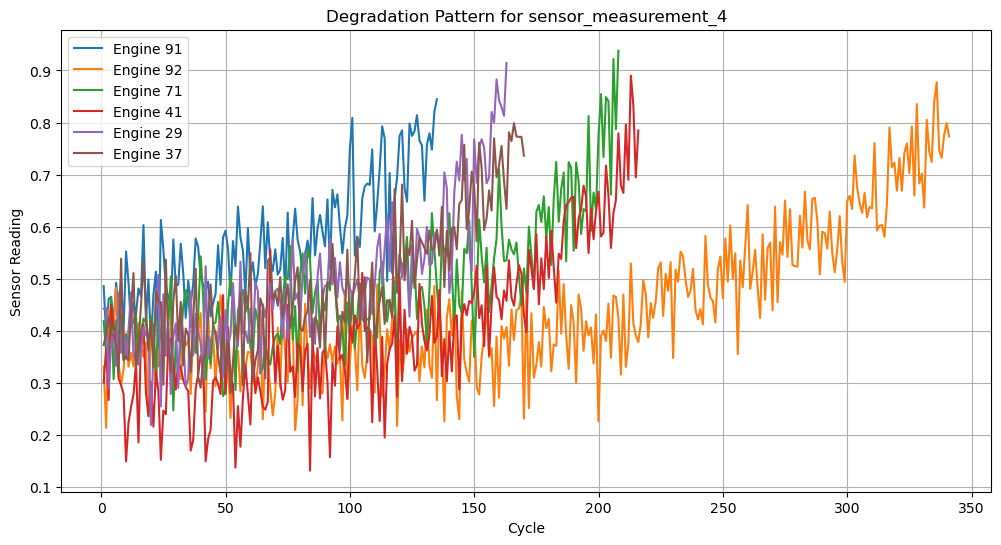

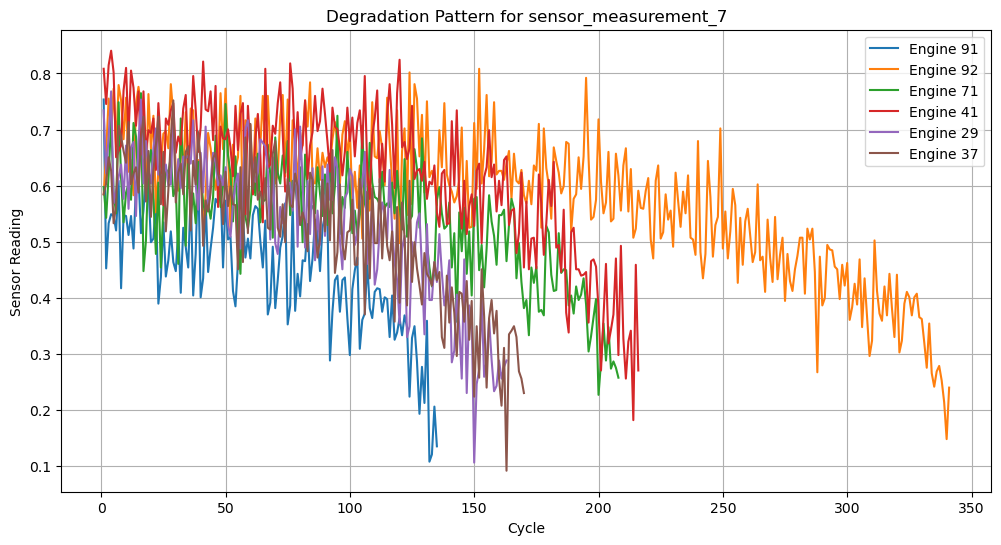

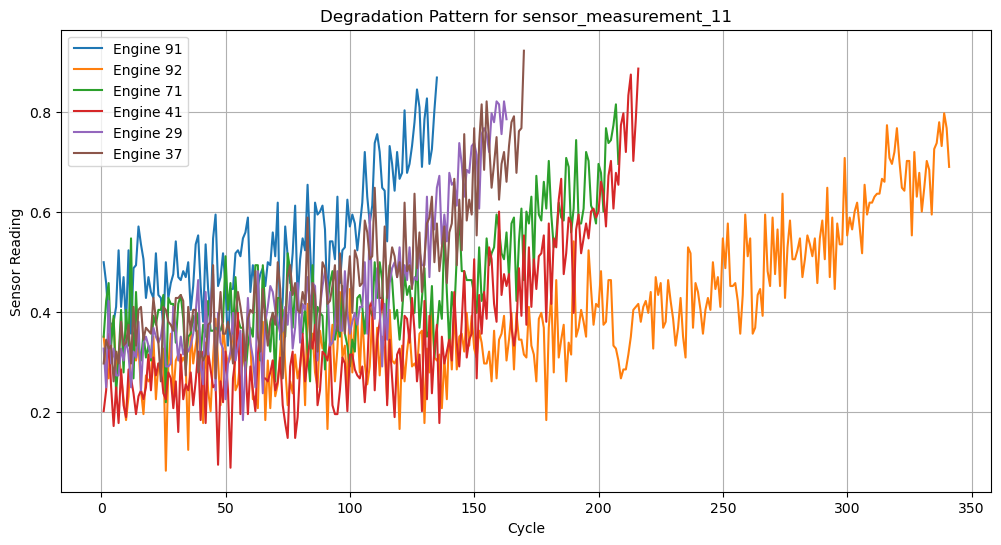

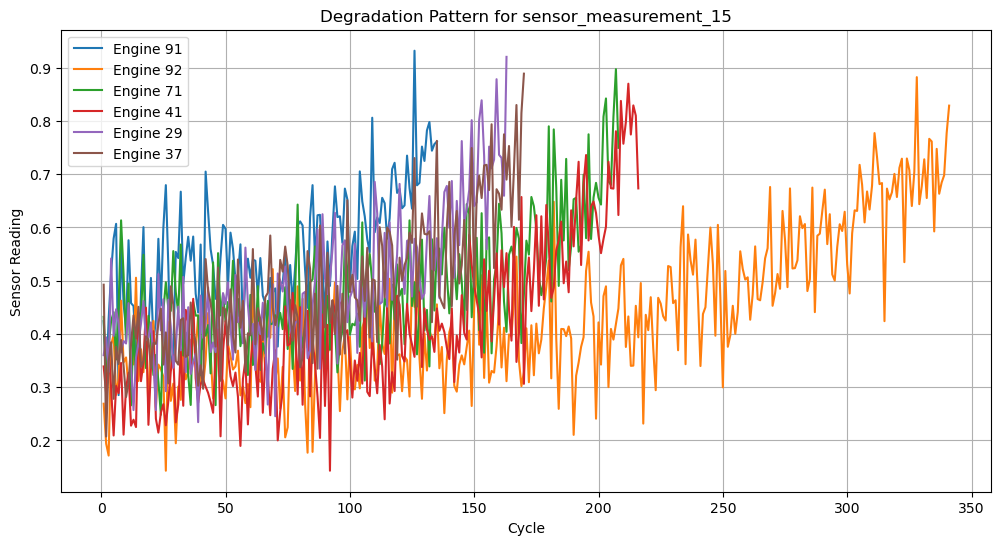

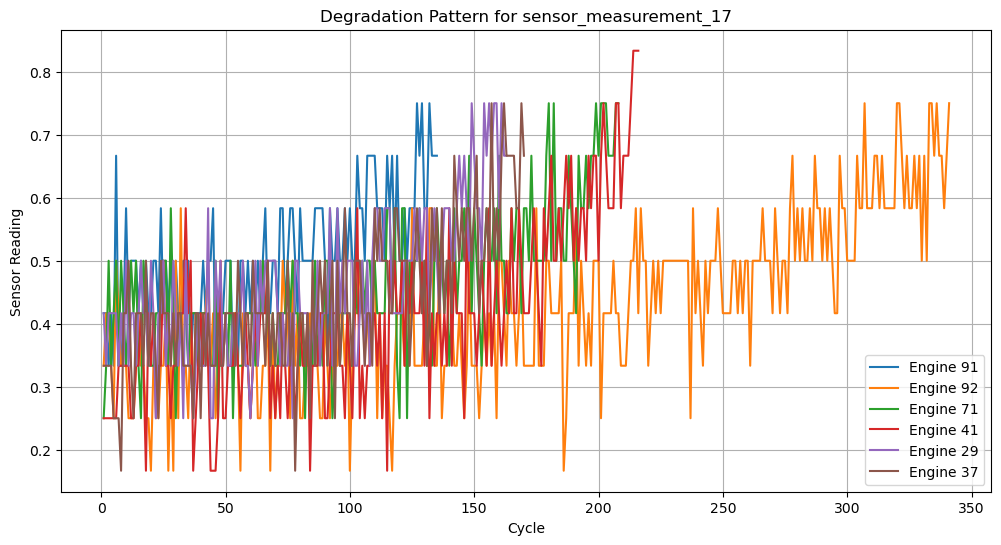

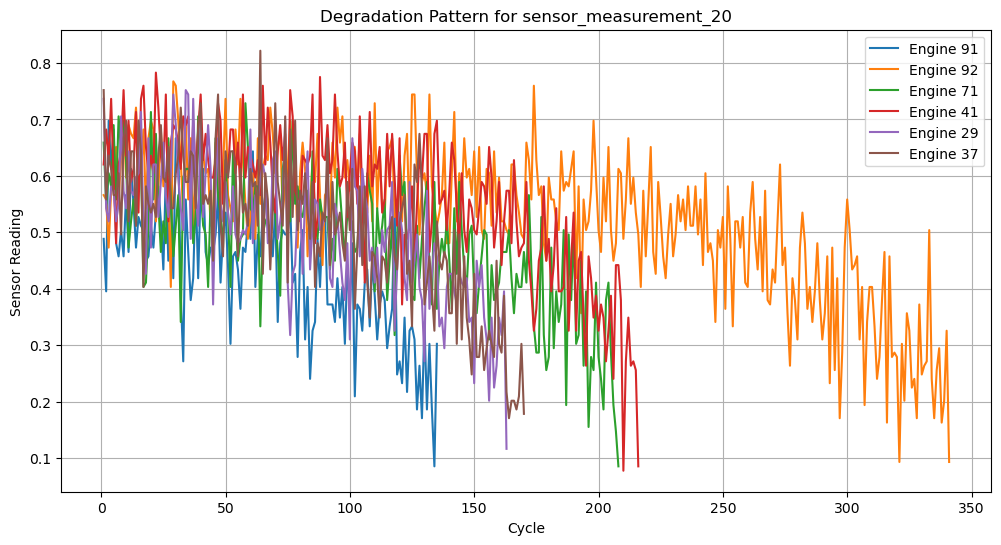

In [13]:
# Step 1: Choose random engines to visualize
engine_list = train_data['engine_no'].unique()
sample_engines = np.random.choice(engine_list, size=6, replace=False)  # Pick 6 random engines

# Step 2: Select a few important sensor columns to plot
selected_sensors = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 
                    'sensor_measurement_7', 'sensor_measurement_11', 'sensor_measurement_15', 
                    'sensor_measurement_17', 'sensor_measurement_20']

# Step 3: Plot
import matplotlib.pyplot as plt

for sensor in selected_sensors:
    plt.figure(figsize=(12,6))
    
    for engine in sample_engines:
        temp = train_data[train_data['engine_no'] == engine]
        plt.plot(temp['cycle'], temp[sensor], label=f'Engine {engine}')
    
    plt.title(f'Degradation Pattern for {sensor}')
    plt.xlabel('Cycle')
    plt.ylabel('Sensor Reading')
    plt.legend()
    plt.grid(True)
    plt.show()


In [14]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
# Define feature columns
feature_cols = setting_cols + sensor_cols  # settings + sensors

# Create X and y
X = train_data[feature_cols]
y = train_data['RUL']

# Train-Test split inside training data (for model validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Initialize the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, random_state=42)

In [17]:
# Make predictions
y_pred = model.predict(X_val)

# Evaluate
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Validation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R2 Score: {r2:.2f}")


Validation MAE: 29.62
Validation RMSE: 41.38
Validation R2 Score: 0.63


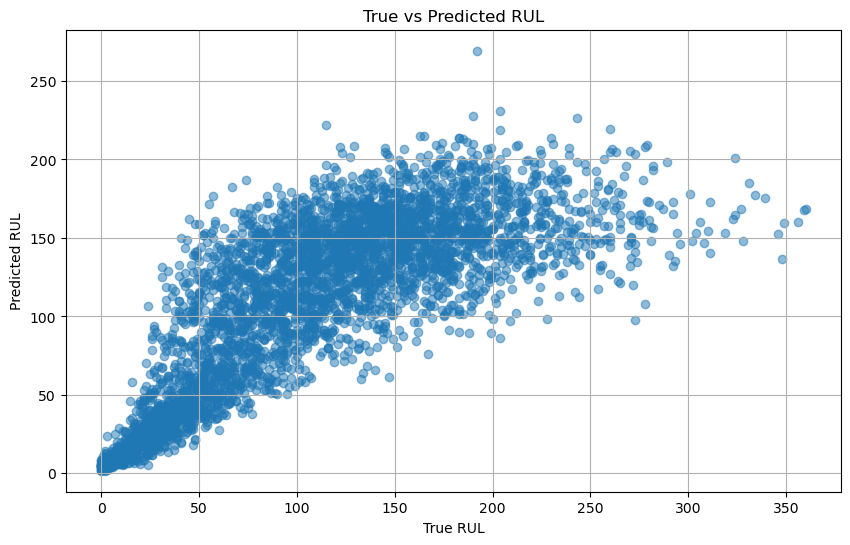

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('True vs Predicted RUL')
plt.grid(True)
plt.show()


In [19]:
# Step 1: For each engine in test data, take only the last cycle
X_test_latest = test_data.groupby('engine_no').last().reset_index()

# Step 2: Keep only the feature columns
X_test = X_test_latest[feature_cols]

# Quick check
X_test.head()


,setting1,setting2,setting3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,...,521.79,2388.06,8130.11,8.4024,0.03,393.0,2388.0,100.0,38.81,23.3552
1,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,...,521.74,2388.09,8126.90,8.4505,0.03,391.0,2388.0,100.0,38.81,23.2618
2,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,...,520.83,2388.14,8131.46,8.4119,0.03,395.0,2388.0,100.0,38.93,23.2740
3,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,...,521.88,2388.11,8133.64,8.4634,0.03,395.0,2388.0,100.0,38.58,23.2581
4,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,...,521.00,2388.15,8125.74,8.4362,0.03,394.0,2388.0,100.0,38.75,23.4117


In [20]:
# Predict RUL for each test engine
y_test_pred = model.predict(X_test)

# Quick look
print("Predicted RULs for test engines:")
print(y_test_pred[:10])  # First 10 engines


Predicted RULs for test engines:
[124.13735491 124.13735491 124.13735491 124.13735491 124.13735491
 124.13735491 124.13735491 124.13735491 124.13735491 124.13735491]


In [21]:
# Load true RUL values
true_rul = rul_data[0].values  # it has no header, just one column

# Evaluate
test_mae = mean_absolute_error(true_rul, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(true_rul, y_test_pred))
test_r2 = r2_score(true_rul, y_test_pred)

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R2 Score: {test_r2:.2f}")


Test MAE: 50.95
Test RMSE: 63.96
Test R2 Score: -1.37


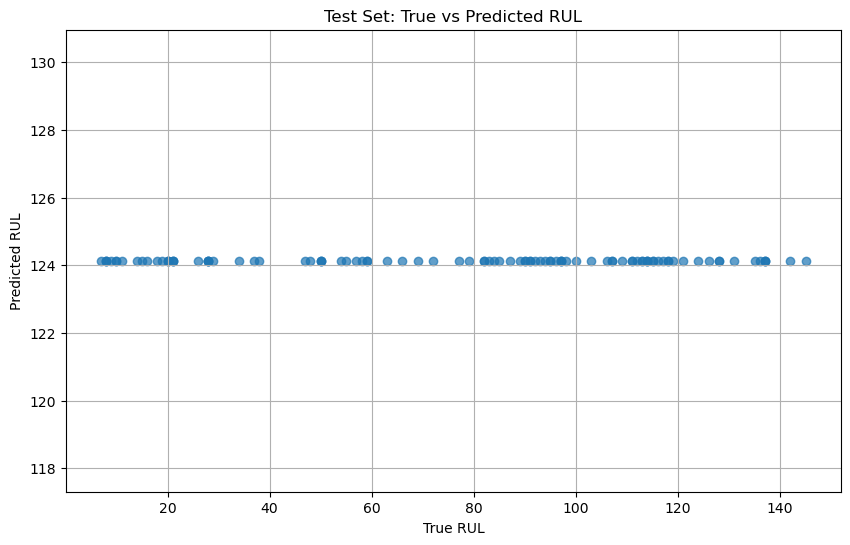

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(true_rul, y_test_pred, alpha=0.7)
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('Test Set: True vs Predicted RUL')
plt.grid(True)
plt.show()


In [23]:
# Step 1: Calculate residuals (errors)
residuals = y_val - y_pred  # true - predicted

# Step 2: Calculate standard deviation of residuals
residual_std = np.std(residuals)

print(f"Standard deviation of prediction errors: {residual_std:.2f}")


Standard deviation of prediction errors: 41.37


In [24]:
# Step 3: Define confidence level (say 95%)
confidence_multiplier = 2  # 95% confidence roughly = mean ± 2 std (Normal distribution)

# Step 4: Calculate upper and lower bounds
y_test_lower = y_test_pred - (confidence_multiplier * residual_std)
y_test_upper = y_test_pred + (confidence_multiplier * residual_std)

# Step 5: Make sure no negative RULs (set minimum to 0)
y_test_lower = np.maximum(0, y_test_lower)


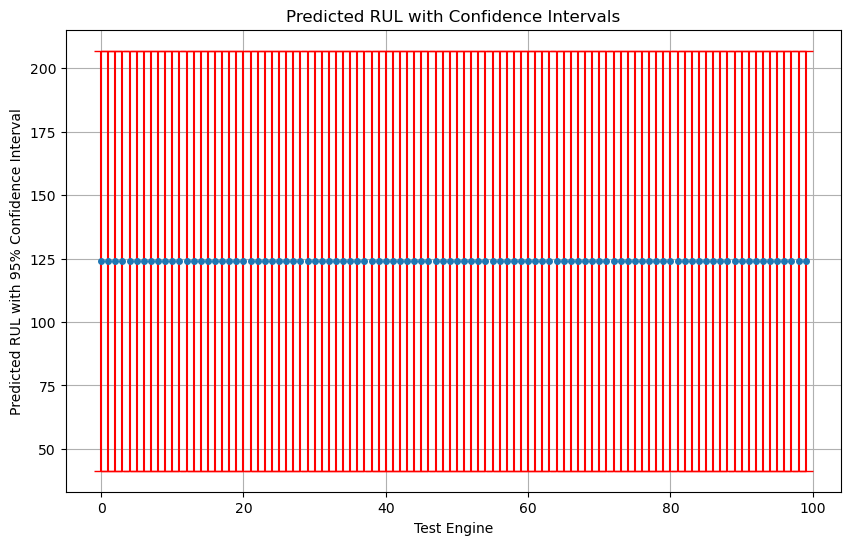

In [25]:
# Step 6: Visualize
plt.figure(figsize=(10,6))
plt.errorbar(range(len(y_test_pred)), y_test_pred, 
             yerr=confidence_multiplier * residual_std, fmt='o', ecolor='red', capsize=5, markersize=4)
plt.xlabel('Test Engine')
plt.ylabel('Predicted RUL with 95% Confidence Interval')
plt.title('Predicted RUL with Confidence Intervals')
plt.grid(True)
plt.show()


In [26]:
import joblib

# Save model
joblib.dump(model, '../src/gbm_model.pkl')

# Save scalers
joblib.dump(scaler_sensors, '../src/scaler_sensors.pkl')
joblib.dump(scaler_settings, '../src/scaler_settings.pkl')


['../src/scaler_settings.pkl']